Packages and Functions

In [2]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data

In [34]:
#Read in our data to dataframe

data = pd.read_csv(r"C:\Users\nikhi\Downloads\sleeptime_prediction_dataset.csv")

data.head(10)

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50
5,0.47,1.52,2.07,9.77,109.12,1.73,4.01
6,0.17,0.90,2.44,7.11,226.96,0.06,3.62
7,2.60,1.55,2.63,4.44,77.21,1.29,6.77
8,1.80,0.13,3.72,7.76,208.05,1.53,3.80
9,2.12,0.98,1.23,5.52,11.91,1.52,6.99


In [4]:
#Checking to see if features have null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB


Creating training and test data

In [5]:
from sklearn.model_selection import train_test_split

x = data.drop(['SleepTime'], axis=1)
y = data['SleepTime']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train_data = x_train.join(y_train)

train_data

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
1590,2.08,1.90,2.25,5.15,153.06,0.95,6.27
1414,1.59,1.57,1.20,6.91,140.34,0.83,5.83
387,0.53,1.20,1.19,8.46,99.97,1.95,5.11
157,2.28,0.70,4.40,8.34,115.49,0.46,3.33
1565,1.27,1.45,1.10,9.36,102.08,0.53,4.67
...,...,...,...,...,...,...,...
109,0.23,1.97,3.31,9.66,231.12,0.34,3.00
1729,1.85,1.19,4.69,7.25,37.70,0.21,3.58
839,1.90,0.74,2.10,9.81,14.75,0.95,4.34
1961,1.23,0.79,4.79,5.89,171.21,1.69,3.96


Visualization

array([[<Axes: title={'center': 'WorkoutTime'}>,
        <Axes: title={'center': 'ReadingTime'}>,
        <Axes: title={'center': 'PhoneTime'}>],
       [<Axes: title={'center': 'WorkHours'}>,
        <Axes: title={'center': 'CaffeineIntake'}>,
        <Axes: title={'center': 'RelaxationTime'}>],
       [<Axes: title={'center': 'SleepTime'}>, <Axes: >, <Axes: >]],
      dtype=object)

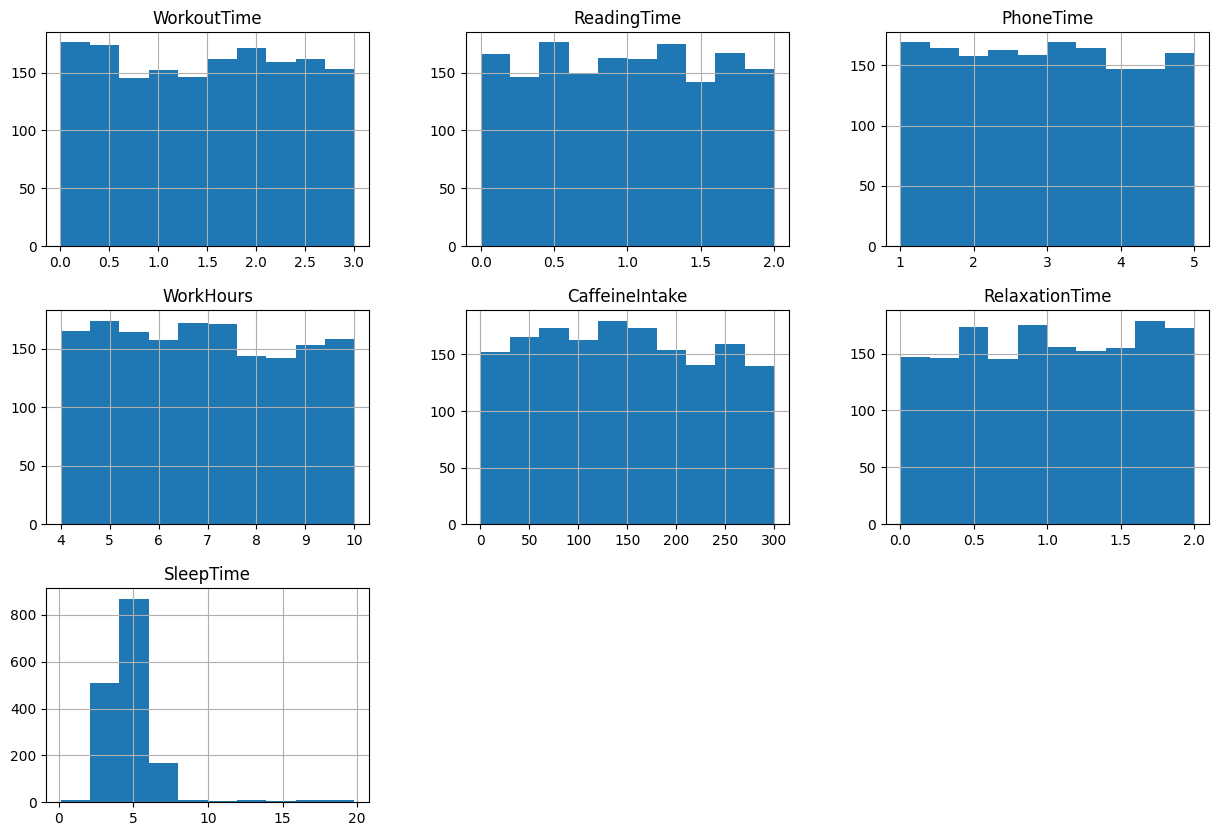

In [53]:
#Using histogram to visualize data and identify and outliers
train_data.hist(figsize=(15, 10))

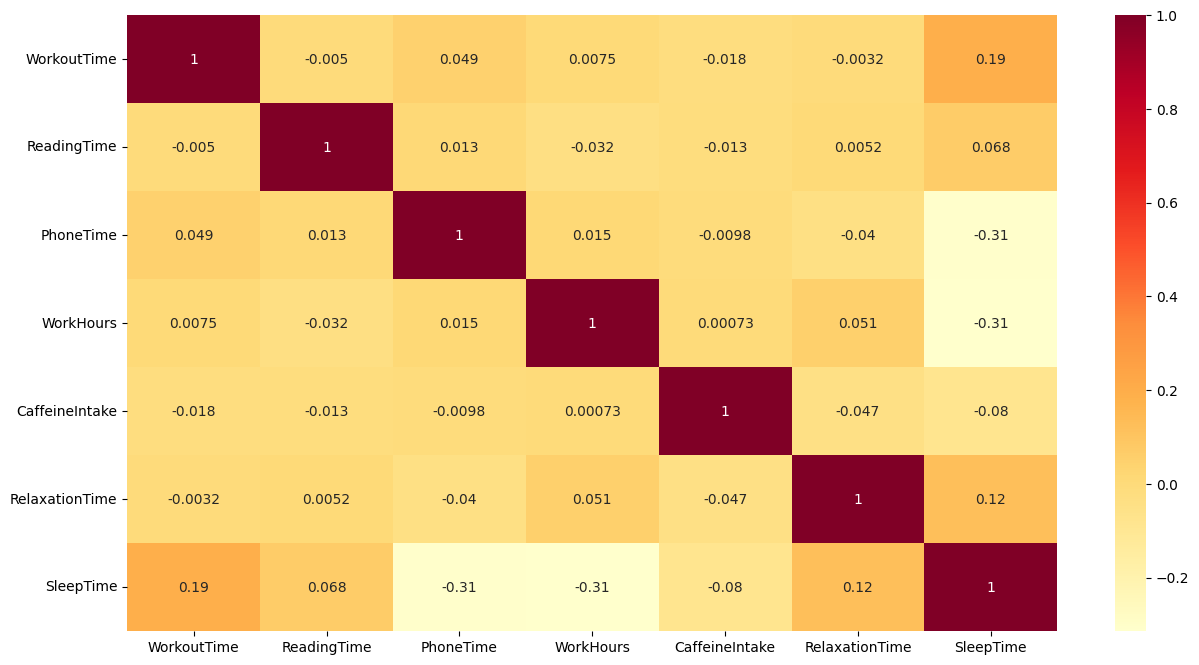

In [ ]:
#Heatmap to see correlation between variables
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlOrRd")
plt.show()

Modeling


In [62]:
#Importing Linear Regression model and using scaler to normalize the input variable
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['SleepTime'], axis =1), train_data['SleepTime']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [63]:
test_data = x_test.join(y_test)

x_test_s = scaler.transform(x_test)

In [65]:
#Evaluating regression model
reg.score(x_test_s, y_test)

0.26325709480170845

Results are not good :(

In [ ]:
#Importing random forest model  and fitting model with variables
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [97]:
#Evaluating forest regressor model
forest.score(x_test_s, y_test)

0.1624416763946671

Keeps resulting in an R-squared close to 0 indicating that the model is not explaining much of the variance, suggesting a weak or nonexistent relationship between the variables. Uninformative features are yielding low correlation which makes the model unable to make any connection or predict accurately. Issues can also be related to small dataset and lack of potential to do any feature engineering. 